This is an introductory notebook to help you get started with Optical Character Recognition (OCR) using Python-tesseract which is a python wrapper for [Google’s Tesseract-OCR Engine](https://github.com/tesseract-ocr/tesseract). In 

In [1]:
#!sudo apt install -q tesseract-ocr
!pip install -q pytesseract

In [3]:
import pytesseract
from pytesseract import Output
import cv2
from skimage import io
import matplotlib.pyplot as plt


In [4]:
url = "https://raw.githubusercontent.com/Tuchsanai/152-478-Introduction-to-Deep-Learning-for-Artificial-Intelligence-Engineering/main/05_Image_Video_OpenCV/09_Tesseract/invoice01.jpg"

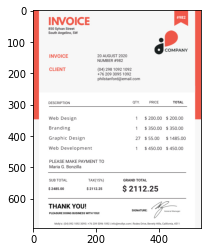

In [5]:
img = io.imread(url)
plt.imshow(img)

## 1. Getting boxes around text

We can pass an image into pytesseract.image_to_data() function that will detect words in our document and return useful information regarding the detected words into a dictionary.

In [6]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

Among the data returned by pytesseract.image_to_data():
* text are the words detected
* left is the distance from the upper-left corner of the bounding box, to the left border of the image.
* top is the distance from the upper-left corner of the bounding box, to the top border of the image.
* width and height are the width and height of the bounding box.
* conf is the model's confidence for the prediction for the word within that bounding box. If conf is -1, that means that the corresponding bounding box contains a block of text, rather than just a single word.

Let us see some random data inside the dict.

In [ ]:
for i in range(100, 105):
    print(f"Left Distance:{d['left'][i]}",
          f"Top Distance:{d['top'][i]}",
          f"Width:{d['width'][i]}",
          f"Height:{d['height'][i]}",
          f"Text:{d['text'][i]}",
          f"Conf:{d['conf'][i]}\n")

Left Distance:50 Top Distance:556 Width:348 Height:24 Text: Conf:-1

Left Distance:50 Top Distance:556 Width:348 Height:24 Text: Conf:-1

Left Distance:50 Top Distance:556 Width:348 Height:24 Text: Conf:-1

Left Distance:50 Top Distance:563 Width:49 Height:10 Text:$2485.00 Conf:55

Left Distance:171 Top Distance:563 Width:49 Height:10 Text:sans Conf:0



Now let us actually draw boxes around the detected texts.

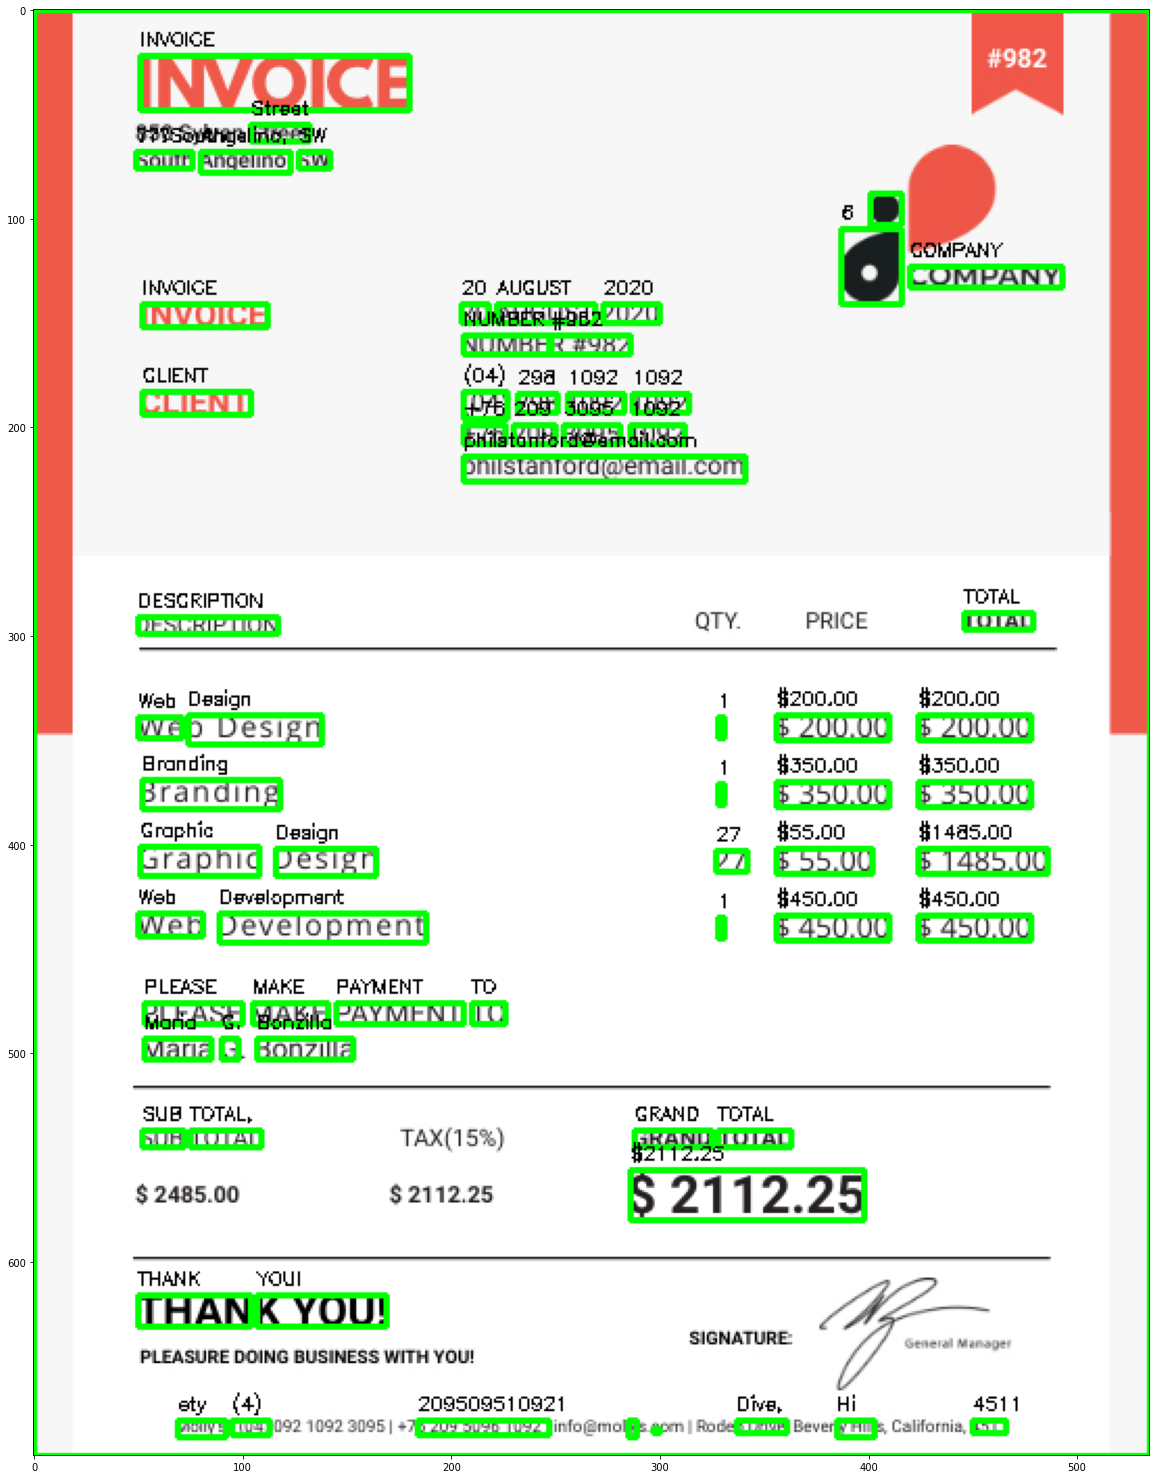

In [ ]:
img = io.imread(url)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i] 
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
        img = cv2.putText(img, d['text'][i], (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1) #Plotting texts on top of box
        
plt.imshow(img)

## 2. Text Template Matching

Now, we will try to find some particular text in the invoice by matching it to a template. In this example, we will try to locate the email adress in the invoice and draw a bounding box around the email address. For this, we will use the image_to_data function to extract all the texts and then use regular expression to find email address. If any match is found, we will simply draw a bounding box around it as perviously done.

In [ ]:
import re

email_pattern = '\S+@\S+'


d = pytesseract.image_to_data(img, output_type=Output.DICT)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if re.match(email_pattern, d['text'][i]):
            (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i] 
            img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
            print(f"Email: {d['text'][i]}")
        
plt.imshow(img)

TypeError: ignored